## Table of Contents
- [Introduction](#intro)
- [Gathering data](#gather)
- [Assessing data](#assess)
- [Cleaning data](#clean)
- [Analyzing and Visualizing](#storing)

<a id='intro'></a>
## Introduction



The purpose of this project is to put in practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program. The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. 

<a id='gather'></a>
## Gathering data

1. **Twitter archive file:** download this file manually by clicking the following link: twitter_archive_enhanced.csv


- **The tweet image predictions:** i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv


- **Twitter API & JSON:** Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
    Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

## Required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import os
from timeit import default_timer as timer

### 1- Twitter archive file :

In [2]:
twi_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twi_archive.shape

(2356, 17)

### 2- The tweet image predictions :

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(url)
with open('image_predictions.tsv', 'wb') as f:
        f.write(r.content)
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t' )  

In [5]:
image_prediction.shape

(2075, 12)

### 3- Twitter API & JSON :

https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True , wait_on_rate_limit_notify = True)

In [7]:
count = 0

# Fetch tweets from the twitter API using the following loop:
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []

for tweet_id in twi_archive.tweet_id.values:
    count += 1
    print(str(count) + ": " + str(tweet_id))
    try:
        list_of_tweets.append(api.get_status(tweet_id))
        print("Success")
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)
        print("Fail")
        
print('The number of tweets not found', len(cant_find_tweets_for_those_ids))

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 482


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 418


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
20

Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
23

In [8]:
#Then in this code block we isolate the json part of each tweepy status object that we have downloaded 
#and we add them all into a list.

my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet._json)

In [9]:
#we write this list into a txt file

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [10]:
#Now we are going to create a DataFrame from the tweet_json.txt file

my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count'])

### END : Gathering DATA 

#### The 3 dataframes are:-

- twi_archive - contains data read from provided csv 
- image_predictions - contains data read (by using requests) from tsv file hosted on server
- tweet_json - contains data obtained from twitter handle by using tweepy library and creating a twitter app for oauthshape

<a id='assess'></a>
## Assessing data

### 1- twi_archive :

In [11]:
twi_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
twi_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

There are 181 retweets

In [13]:
# a sample taken from the data. I noticed in some rows, dogs have two age stages.

twi_archive[twi_archive['doggo'] == 'doggo'][['doggo', 'floofer', 'pupper', 'puppo']].sample(20)

,doggo,floofer,pupper,puppo
780,doggo,None,None,None
110,doggo,None,None,None
1030,doggo,None,None,None
585,doggo,None,None,None
956,doggo,None,pupper,None
9,doggo,None,None,None
1141,doggo,None,None,None
733,doggo,None,pupper,None
989,doggo,None,None,None
531,doggo,None,pupper,None


In [14]:
# the real source is found between the HTML start and end tags. example : Twitter for iPhone , Vine...

twi_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
# so many dogs we don't have their age stages.

twi_archive.query('doggo == "None" & floofer == "None" & pupper == "None" & puppo == "None"').shape

(1976, 17)

In [16]:
# we want to see for the different denominator values we have, what are their numerators.

twi_archive.groupby('rating_denominator')['rating_numerator'].unique()

rating_denominator
0                                                  [960]
2                                                    [1]
7                                                   [24]
10     [13, 12, 14, 5, 17, 11, 10, 420, 666, 6, 15, 1...
11                                                [9, 7]
15                                                  [11]
16                                                  [20]
20                                                   [4]
40                                                  [44]
50                                          [50, 45, 60]
70                                                  [84]
80                                              [80, 88]
90                                                  [99]
110                                                [121]
120                                                [144]
130                                                [143]
150                                                [165]
170         

In [17]:
# so many tweets ratings are extracted falsly because the text had two or more fractions. others did not have ratings.

with pd.option_context('max_colwidth', 200):
    display(twi_archive.query('rating_denominator != 10')[['tweet_id','text','rating_numerator', 'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo']])

,tweet_id,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0,None,None,None,None
342,832088576586297345,@docmisterio account started on 11/15/15,11,15,None,None,None,None
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,None,None,None,None
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,None,None,None,None
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11,None,None,None,None
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,None,None,None,None
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,None,None,None,None
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,None,None,None,None
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,None,None,None,None
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,None,None,None,None


In [18]:
#the most frequent numerator are less than 15.

twi_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
# some texts contain two fractions in which the wrong one was selected to form the numerator and denominator.

with pd.option_context('max_colwidth', 200):
    display(twi_archive.query('rating_numerator > 15 & rating_denominator != 10 ')[['tweet_id','text','rating_numerator', 'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo']])

,tweet_id,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0,None,None,None,None
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,None,None,None,None
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,None,None,None,None
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,None,None,None,None
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,None,None,None,None
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,None,None,None,None
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,None,None,None,None
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,None,None,None,None
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50,None,None,None,None
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50,None,None,None,None


In [20]:
# some numerators were actually fractions and only the decimal part was taken. example : 13.5/10 was put 5/10

with pd.option_context('max_colwidth', 200):
    display(twi_archive[twi_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\moni kolli\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [21]:
# Real dog names start with uppercase. all lower case names are random words.

twi_archive[twi_archive.name.str.lower() == twi_archive.name].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

### 2- image_prediction :

In [22]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
image_prediction[image_prediction.jpg_url.duplicated(keep = False)].sort_values('jpg_url')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


In [25]:
# some duplicated jpg_urls are retweets and will be dropped. 

# this is an example
a = image_prediction.loc[[480, 1297]].tweet_id.tolist()

# the first one is not a retweet but the second one is.
twi_archive[twi_archive.tweet_id == a[0]].retweeted_status_id , twi_archive[twi_archive.tweet_id == a[1]].retweeted_status_id

(1865   NaN
 Name: retweeted_status_id, dtype: float64,
 949    6.753544e+17
 Name: retweeted_status_id, dtype: float64)

### 3- tweet_json :

In [230]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35844,7593
1,892177421306343426,30932,5627
2,891815181378084864,23280,3720
3,891689557279858688,39095,7762
4,891327558926688256,37371,8365


In [27]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2330 non-null   object
 1   favorite_count  2330 non-null   int64 
 2   retweet_count   2330 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [28]:
# using the describe method to see some statistics about the data.

tweet_json.describe()

,favorite_count,retweet_count
count,2330.000000,2330.000000
mean,7482.060515,2664.975107
std,11620.759467,4510.492769
min,0.000000,1.000000
25%,1301.000000,541.000000
50%,3250.500000,1246.500000
75%,9156.250000,3095.750000
max,154441.000000,76689.000000


## Quality Issues

**twi_archive dataset:**

- 181 retweets to be dropped.
- NaN values named with other names like NONE in status columns. 
- timestamp type object. (to be changed to datetime)
- change source column values to these basic values : [twitter, vine, tweetdeck, iphone].
- convert columns doggo, floofer, pupper, puppo values into true/false.
- validate and correct rating numerator and denominator.
- Convert wrong names into nan values.
- Delete columns that won't be used for analysis. (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)


**image_prediction dataset:**

- drop duplicated jpg_urls
- extract dog breed from columns p#, p#_conf and p#_dog.
- Delete columns that won't be used for analysis. (img_num, jpg_url)

**tweet_json dataset:**

- tweet_id type object. (to be changed to int64)

## Tidiness Issues

- group age stages (doggo, floofer, pupper, puppo) into one column named "stage"
- create dog bread column.
- the three datasets need to be merged into one.

### END : Assessing DATA 

- 11 quality issues
- 3 tidiness issues

<a id='clean'></a>
## Cleaning Data

In [104]:
# making copies of the original datasets.

twi_archive_clean = twi_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

To make things easier, I decided to fix the tidiness issue : "the three datasets need to be merged into one" first.

But I need to change the datatype of tweet_json.tweet_id first.

## 1- tweet_json :

- Quality

#### Define

1 - change tweet_id type to int64.

#### Code

In [105]:
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype('int64')

#### Test

In [106]:
tweet_json_clean.tweet_id.dtypes

dtype('int64')

## 2- twi_archive:
- Tidiness

#### Define

2 - merge the image_prediton_clean and tweet_json_clean with twi_archive_clean.

#### Code

In [107]:
df = twi_archive_clean.set_index('tweet_id').join(tweet_json_clean.set_index('tweet_id'))
df = df.join(image_prediction_clean.set_index('tweet_id'))

#### Test

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   in_reply_to_status_id       78 non-null     float64
 1   in_reply_to_user_id         78 non-null     float64
 2   timestamp                   2356 non-null   object 
 3   source                      2356 non-null   object 
 4   text                        2356 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  doggo                       2356 non-null   object 
 13  fl

In [110]:
df.shape

(2356, 29)

- Quality

#### Define

3 - 181 retweets to be dropped.

#### Code

In [111]:
df = df[df.retweeted_status_id.isnull()]

#### Test

In [112]:
df.retweeted_status_id.notnull().sum()

0

#### Define

4 - NaN values named with other names like NONE in stage columns.

#### Code

In [113]:
df.replace('None', np.nan, inplace=True)

#### Test

In [114]:
df[['doggo', 'floofer', 'pupper', 'puppo']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   doggo    87 non-null     object
 1   floofer  10 non-null     object
 2   pupper   234 non-null    object
 3   puppo    25 non-null     object
dtypes: object(4)
memory usage: 85.0+ KB


#### Define

5 - timestamp type object. (to be changed to datetime)

#### Code

In [115]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

#### Test

In [116]:
df['timestamp'].dtypes

datetime64[ns, UTC]

#### Define

6 - change source column values to these basic values : [twitter, vine, tweetdeck, iphone].

#### Code

In [117]:
#using regular expressions

import re

df['source'] = df['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [118]:
df.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Define

7 - convert columns doggo, floofer, pupper, puppo values into true/false.

#### Code

In [119]:
df.doggo.replace(np.nan, False,inplace=True)
df.floofer.replace(np.nan, False,inplace=True)
df.pupper.replace(np.nan, False,inplace=True)
df.puppo.replace(np.nan, False,inplace=True)

df.doggo.replace('doggo', True,inplace=True)
df.floofer.replace('floofer', True,inplace=True)
df.pupper.replace('pupper', True,inplace=True)
df.puppo.replace('puppo', True,inplace=True)

#### Test

In [122]:
df[['doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,doggo,floofer,pupper,puppo
tweet_id,,,,
706291001778950144,False,False,False,False
668256321989451776,False,False,False,False
822975315408461824,False,False,False,False
671518598289059840,False,False,False,False
667902449697558528,False,False,False,False
674632714662858753,False,False,False,False
790987426131050500,False,False,False,False
740676976021798912,False,False,True,False
793210959003287553,False,False,False,False


#### Tidiness

#### Define

8 - group age stages (doggo, floofer, pupper, puppo) into one column as age_stage

#### Code

In [123]:
def stage(row):
    if row.doggo:
        return 'doggo'
    elif row.floofer:
        return 'floofer'
    elif row.pupper:
        return 'pupper'
    elif row.puppo:
        return 'puppo'
    else:
        return np.NaN
    
df['stage'] = df.apply(stage,axis=1)

In [124]:
df['stage'].value_counts()

pupper     224
doggo       87
puppo       24
floofer      9
Name: stage, dtype: int64

In [125]:
df.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)

#### Test

#### Define

9 - validate and correct rating numerator and denominator.

* numerator :

#### Code

In [126]:
# converting type to float to allow decimals
df[['rating_numerator', 'rating_denominator']] = df[['rating_numerator','rating_denominator']].astype(float)

In [127]:
with pd.option_context('max_colwidth', 200):
    display(df[df['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['text','rating_numerator']])

C:\Users\moni kolli\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
tweet_id,,
883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0
681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0
680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


In [128]:
a = df['text'].str.extractall(r'(\d+\.\d+)\/').astype(float).droplevel(['match']).index.tolist()
b = df['text'].str.extractall(r'(\d+\.\d+)\/').astype(float).droplevel(['match'])
b

,0
tweet_id,
883482846933004288,13.50
786709082849828864,9.75
778027034220126208,11.27
681340665377193984,9.50
680494726643068929,11.26


In [129]:
df.loc[a , 'rating_numerator'] = b[0]

#### Test

In [130]:
with pd.option_context('max_colwidth', 200):
    display(df[df['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['text', 'rating_numerator', 'rating_denominator']])

C:\Users\moni kolli\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator,rating_denominator
tweet_id,,,
883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


#### Code

In [131]:
df.query('rating_numerator > 15')['text'].str.extractall(r'(\d+)\/')

0
tweet_id           match      
881633300179243008 0        17
                   1        13
855862651834028034 0       420
855860136149123072 0       666
838150277551247360 0       182
835246439529840640 0       960
                   1        13
820690176645140481 0        84
810984652412424192 0        24
758467244762497024 0       165
749981277374128128 0      1776
731156023742988288 0       204
716439118184652801 0        50
                   1        11
713900603437621249 0        99
710658690886586372 0        80
709198395643068416 0        45
704054845121142784 0        60
697463031882764288 0        44
684225744407494656 0       143
684222868335505415 0       121
682808988178739200 0        20
677716515794329600 0       144
675853064436391936 0        88
670842764863651840 0       420

In [132]:
a = df.query('rating_numerator > 15')['text'].str.extractall(r'(\d+)\/').astype(float)

In [133]:
idx = pd.IndexSlice
b = a.loc[idx[:, 1] , idx[ 0]]
b

tweet_id            match
881633300179243008  1        13.0
835246439529840640  1        13.0
716439118184652801  1        11.0
Name: 0, dtype: float64

In [134]:
c = b.droplevel(['match']).index.tolist()
c

[881633300179243008, 835246439529840640, 716439118184652801]

In [135]:
df.loc[c , 'rating_numerator'] = b.tolist()

#### Test

In [137]:
df.query('rating_numerator == 960')

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
tweet_id,,,,,,,,,,,,,,,,,,,,,


#### Code

In [138]:
with pd.option_context('max_colwidth', 200):
    display(df.query('rating_numerator > 15 & rating_denominator != 10')[['text','rating_numerator', 'rating_denominator']])

,text,rating_numerator,rating_denominator
tweet_id,,,
820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0


In [139]:
# not a rating
df.drop(810984652412424192 , inplace = True)

#### Test

In [140]:
df[df.index == 810984652412424192]

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
tweet_id,,,,,,,,,,,,,,,,,,,,,


#### Code

In [141]:
a = df.query('rating_numerator > 15 & rating_denominator != 10').index.tolist()

In [142]:
# feature scaling
df.loc[a , 'rating_numerator'] = (10 * df.loc[a , 'rating_numerator'])/df.loc[a , 'rating_denominator']
df.loc[a , 'rating_denominator'] = 10

#### Test

In [143]:
with pd.option_context('max_colwidth', 200):
    display(df.query('rating_numerator > 15 & rating_denominator != 10')[['text','rating_numerator', 'rating_denominator']])

,text,rating_numerator,rating_denominator
tweet_id,,,


* denominator :

In [144]:
with pd.option_context('max_colwidth', 200):
    display(df.query('rating_denominator != 10')[['text','rating_numerator', 'rating_denominator']])

,text,rating_numerator,rating_denominator
tweet_id,,,
835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",13.0,0.0
832088576586297345,@docmisterio account started on 11/15/15,11.0,15.0
740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.0,50.0
686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4.0,20.0
682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7.0,11.0
666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1.0,2.0


#### Code

In [145]:
# not a rating
df.drop(832088576586297345 , inplace = True)

#### Test

In [147]:
df[df.index == 832088576586297345]

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
tweet_id,,,,,,,,,,,,,,,,,,,,,


#### Code

In [148]:
with pd.option_context('max_colwidth', 200):
    display(df.query('rating_denominator != 10')[['text','rating_numerator', 'rating_denominator']])

,text,rating_numerator,rating_denominator
tweet_id,,,
835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",13.0,0.0
740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.0,50.0
686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4.0,20.0
682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7.0,11.0
666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1.0,2.0


In [149]:
df.query('rating_denominator != 10')['text'].str.extractall(r'\/(\d+)')

0
tweet_id           match    
835246439529840640 0      00
                   1      10
740373189193256964 0      11
                   1      10
722974582966214656 0      20
                   1      10
716439118184652801 0      50
                   1      10
686035780142297088 0      20
682962037429899265 0      11
                   1      10
                   2       7
666287406224695296 0       2
                   1      10

In [150]:
a = df.query('rating_denominator != 10')['text'].str.extractall(r'\/(\d+)').astype(float)

In [151]:
idx = pd.IndexSlice
b = a.loc[idx[:, 1] , idx[ 0]]
b

tweet_id            match
835246439529840640  1        10.0
740373189193256964  1        10.0
722974582966214656  1        10.0
716439118184652801  1        10.0
682962037429899265  1        10.0
666287406224695296  1        10.0
Name: 0, dtype: float64

In [152]:
c = b.droplevel(['match']).index.tolist()
c

[835246439529840640,
 740373189193256964,
 722974582966214656,
 716439118184652801,
 682962037429899265,
 666287406224695296]

In [153]:
df.loc[c , 'rating_denominator'] = b.tolist()

#### Test

In [154]:
with pd.option_context('max_colwidth', 200):
    display(df.query('rating_denominator != 10')[['text','rating_numerator', 'rating_denominator']])

,text,rating_numerator,rating_denominator
tweet_id,,,
686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4.0,20.0


#### Code

In [155]:
# feature scaling
df.loc[686035780142297088 , 'rating_numerator'] = (10 * df.loc[686035780142297088 , 'rating_numerator'])/df.loc[686035780142297088 , 'rating_denominator']
df.loc[686035780142297088 , 'rating_denominator'] = 10

#### Test

In [156]:
with pd.option_context('max_colwidth', 200):
    display(df.query('rating_denominator != 10')[['text','rating_numerator', 'rating_denominator']])

,text,rating_numerator,rating_denominator
tweet_id,,,


#### Define

10 - Convert wrong names into nan values.

#### Code

In [157]:
# Real dog names start with uppercase. all lower case names are random words.

a = df[df.name.str.lower() == df.name].name.unique().tolist()
a

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'very',
 'my',
 'his',
 'an',
 'actually',
 'just',
 'getting',
 'mad',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [158]:
df['name'] = df['name'].apply(lambda x: x if str(x).lower() != x else np.nan)

#### Test

In [159]:
df[df.name.str.lower() == df.name].name.unique()

array([], dtype=object)

## 3- image_prediction :

#### Define

11 - drop duplicates in jpg_urls.

#### Code

In [160]:
df.drop_duplicates(subset= ['jpg_url'] , inplace = True)

#### Test

In [161]:
df.jpg_url.duplicated().sum()

0

#### Define

12 - extract dog breed from columns p#, p#_conf and p#_dog.

#### Code

In [162]:
def bread(row):
    p_conf = 0
    p_name = ''
    is_bread = False
    if(row.p1_dog == True):
        if(row.p1_conf >= p_conf):
            p_conf = row.p1_conf
            p_name = row.p1
            is_bread = True
    if(row.p2_dog == True):
        if(row.p2_conf >= p_conf):
            p_conf = row.p2_conf
            p_name = row.p2
            is_bread = True
    if(row.p3_dog == True):
        if(row.p2_conf >= p_conf):
            p_conf = row.p3_conf
            p_name = row.p3
            is_bread = True
    if is_bread == False:
        return np.nan
    else:
        return p_name
        
        
    
df['bread'] = df.apply(bread,axis=1)

#### Test

In [163]:
df['bread'].unique()

array([nan, 'Chihuahua', 'Labrador_retriever', 'basset',
       'Chesapeake_Bay_retriever', 'Appenzeller', 'Pomeranian',
       'Irish_terrier', 'Pembroke', 'Samoyed', 'French_bulldog',
       'golden_retriever', 'whippet', 'Siberian_husky',
       'Mexican_hairless', 'kuvasz', 'pug', 'Blenheim_spaniel',
       'malamute', 'Italian_greyhound', 'chow', 'German_shepherd',
       'Doberman', 'Eskimo_dog', 'Weimaraner', 'Saluki',
       'miniature_pinscher', 'German_short-haired_pointer',
       'English_springer', 'vizsla', 'bloodhound', 'Bernese_mountain_dog',
       'West_Highland_white_terrier', 'cocker_spaniel',
       'flat-coated_retriever', 'Cardigan', 'Newfoundland', 'dalmatian',
       'Shetland_sheepdog', 'komondor', 'kelpie',
       'Greater_Swiss_Mountain_dog', 'Border_collie', 'bull_mastiff',
       'Staffordshire_bullterrier', 'Lakeland_terrier',
       'Australian_terrier', 'Bouvier_des_Flandres', 'Bedlington_terrier',
       'Boston_bull', 'Old_English_sheepdog', 'black-an

#### Define

14 - Delete columns that won't be used for analysis.

#### Code

In [166]:
df = df.drop(['p1' , 'p1_conf' , 'p1_dog', 'p2' , 'p2_conf' , 'p2_dog', 'p3' , 'p3_conf' , 'p3_dog',
                        'img_num', 'expanded_urls', 'retweeted_status_timestamp', 'retweeted_status_user_id',
                        'retweeted_status_id', 'in_reply_to_user_id', 'in_reply_to_status_id' ], axis = 1);

#### Test

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 892420643555336193 to 666020888022790149
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           1994 non-null   datetime64[ns, UTC]
 1   source              1994 non-null   object             
 2   text                1994 non-null   object             
 3   rating_numerator    1994 non-null   float64            
 4   rating_denominator  1994 non-null   float64            
 5   name                1349 non-null   object             
 6   favorite_count      1986 non-null   float64            
 7   retweet_count       1986 non-null   float64            
 8   jpg_url             1993 non-null   object             
 9   stage               306 non-null    object             
 10  bread               1685 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(4), object(6)
memory usage: 1

## 4 - Storing data:

In [39]:
#Storing the clean DataFrame in a CSV file called twitter_master
df.to_csv('twitter_archive_master.csv')

NameError: name 'df' is not defined

### END : Clean DATA 

- the Data set is successfully cleaned to make the analysis possible and correct.
- the rating and bread are the most important and will be much used in the analysis, which is why these columns were cleaned as much as possible.
- I have avoided to clean the data manually taking in consideration that it will not always be possible in future tasks.

<a id='storing'></a>
## Analysing and Visualizing DATA :

### Questions :

- do retweet count and favorite count depend on dog bread ?
- what are the breads with the highest ratings, and what is their most commun age stage ?
- what is the relationship between the rating and retweet count and favorite count ?
- dog bread and its name, are they related ?
-  are the most used dog names and retweet and favorite count related ?

In [355]:
tweets = pd.read_csv('twitter_master.csv')

### Functions :

#### 1 - Grouped bar function :

* this function will be used to PLOT a Grouped Bar Chart that displays the average favorites count and the average retweet count by the different independent discrete variables that we have.

In [409]:
def Grouped_bar(x, y,z):
    ticks = np.arange(x.shape[0])
    label = x.index
    width = 0.35
    fig, ax = plt.subplots(figsize=(30,15))
    rects1 = ax.bar(ticks - width/2, x['retweet_count'], width, label='retweet', color='pink')
    rects2 = ax.bar(ticks + width/2, x['favorite_count'], width, label='favorite', color='purple')
    ax.set_ylabel('average favorites and retweets count', fontsize=20)
    ax.set_xlabel(y, fontsize=20)
    ax.set_title('{variable} of dogs {rest}'.format(variable=y, rest=z), fontsize=20)
    ax.set_xticks(ticks)
    ax.set_xticklabels(label , fontsize=13)
    ax.legend();

### Answers :

#### 1- do retweet count and favorite count depend on dog bread ?

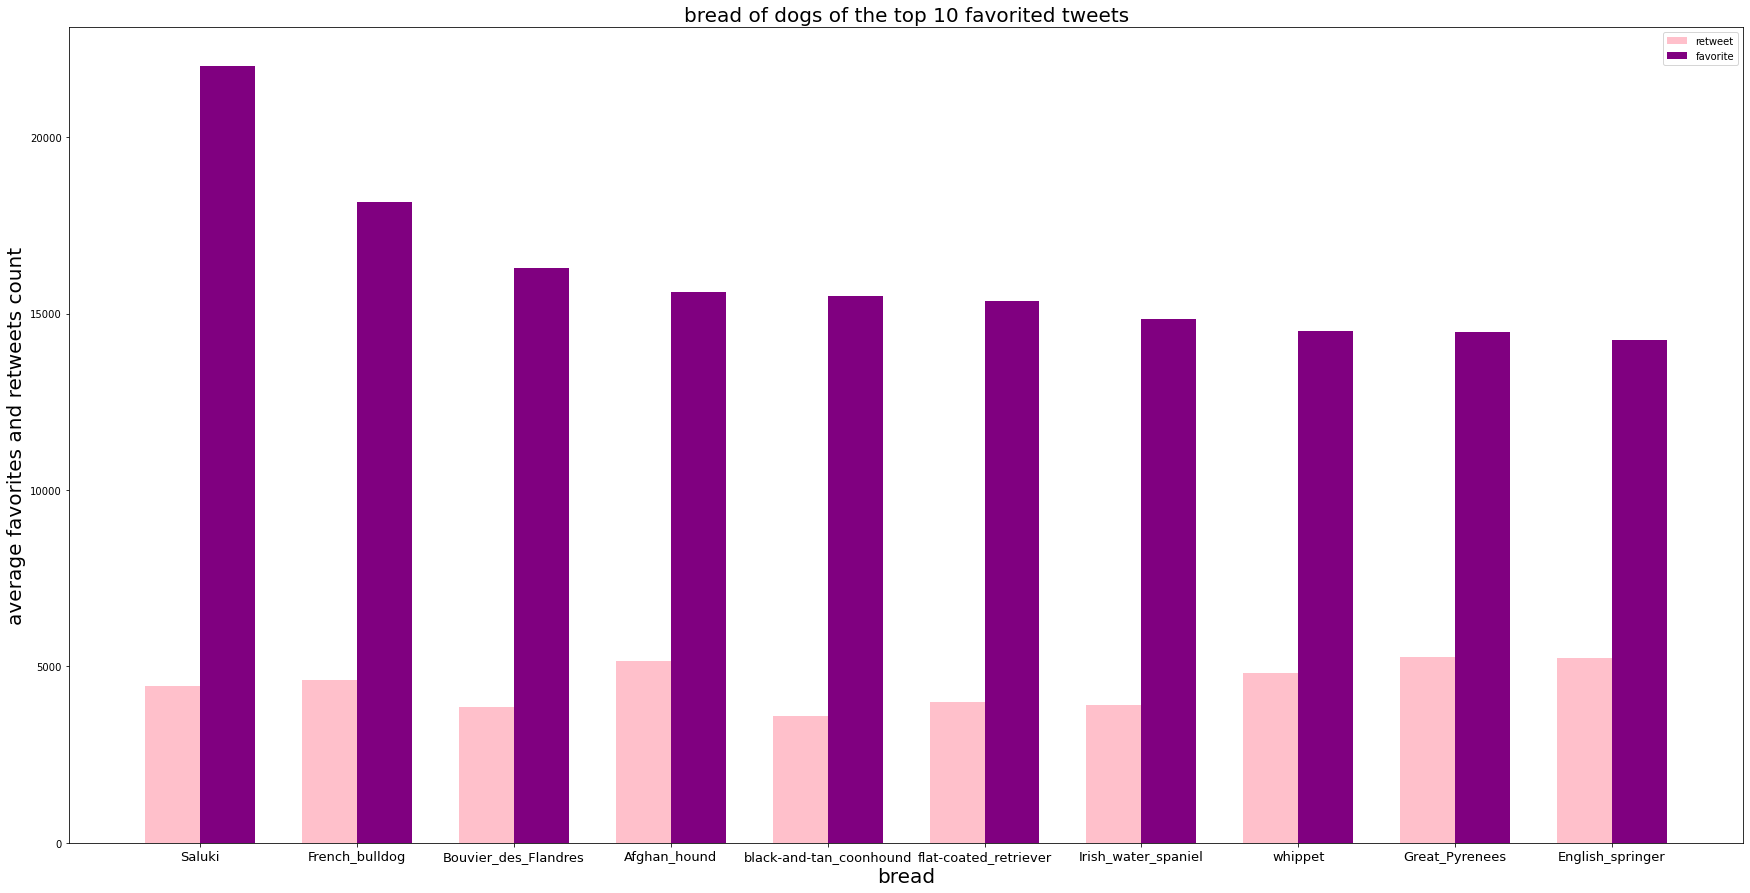

In [419]:
# the average retweet and favorite count was calculated for each bread.

df_bread = tweets.groupby('bread')[['retweet_count', 'favorite_count']].mean().sort_values('favorite_count', axis=0, ascending=False)
df_bread = df_bread.head(10)
Grouped_bar(df_bread , 'bread', 'of the top 10 favorited tweets')

In [420]:
df_bread

,retweet_count,favorite_count
bread,,
Saluki,4451.250000,22008.750000
French_bulldog,4617.500000,18158.766667
Bouvier_des_Flandres,3859.000000,16302.000000
Afghan_hound,5149.333333,15620.666667
black-and-tan_coonhound,3585.500000,15507.000000
flat-coated_retriever,3988.625000,15341.000000
Irish_water_spaniel,3911.666667,14832.333333
whippet,4824.400000,14503.200000
Great_Pyrenees,5258.294118,14469.529412


because the number of tweets in our dataset is NOT the same for each dog bread, I had to calculate the mean favorite count for each bread (the sum of the favorites by the number of tweets) and then I picked 10 highest average counts of favorites of the tweets.

I am also displaying the retweet avergae count for the most loved dogs in our dataset (top favorite avergae count).

The Saluki bread is the most loved/favorited.

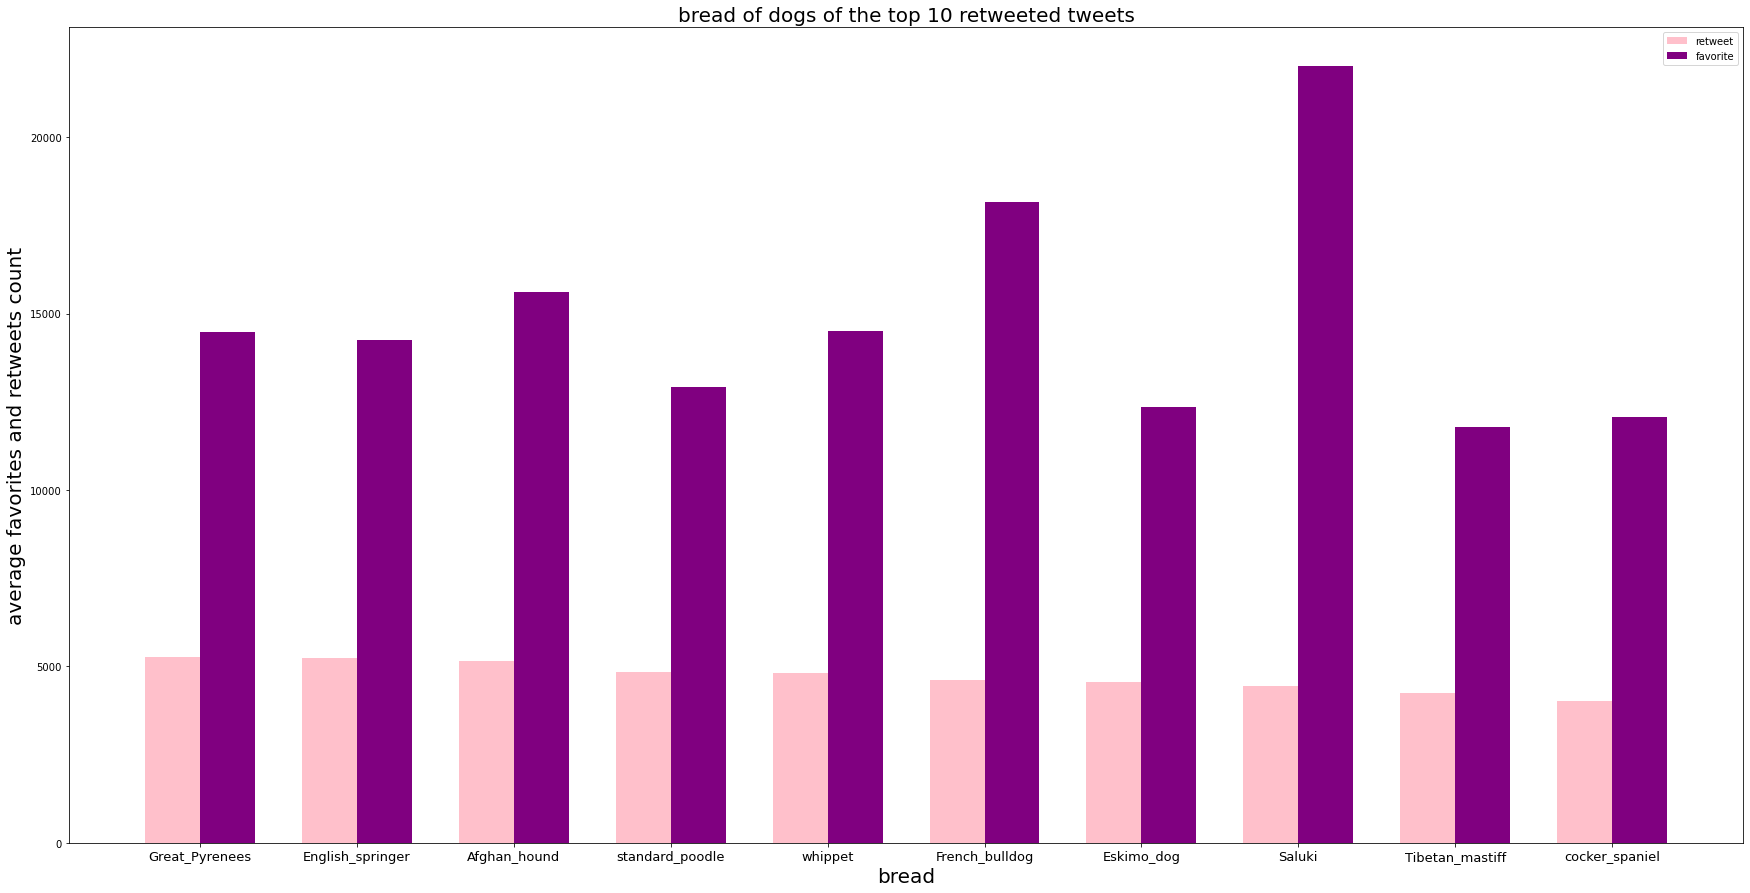

In [421]:
# the only way this is different from the previous is, the values are sorted by the average retweet count instead of 
# the average favorite count. which is why we got different top 10 dog bread list this time.

df_bread = tweets.groupby('bread')[['retweet_count', 'favorite_count']].mean().sort_values('retweet_count', axis=0, ascending=False)
df_bread = df_bread.head(10)
Grouped_bar(df_bread , 'bread', 'of the top 10 retweeted tweets')

In [422]:
df_bread

,retweet_count,favorite_count
bread,,
Great_Pyrenees,5258.294118,14469.529412
English_springer,5224.777778,14247.777778
Afghan_hound,5149.333333,15620.666667
standard_poodle,4831.818182,12927.818182
whippet,4824.400000,14503.200000
French_bulldog,4617.500000,18158.766667
Eskimo_dog,4556.333333,12356.833333
Saluki,4451.250000,22008.750000
Tibetan_mastiff,4245.200000,11783.800000


The same revious concept has been applied to the retweet count. 

Although Saluki has the biggest favorite count, Great Pyrenees is the dog bread of the most retweeted tweet.

#### 2 - what are the breads with the highest ratings, and what is their most commun age stage ?

In [375]:
# The average rating was calculated. it is the sum of the rating numerators for each bread devided by the number or 
# tweets of each bread.

df_bread = tweets.groupby('bread')[['rating_numerator']].mean().sort_values(by='rating_numerator')

df_bread = df_bread.tail(10)
df_bread

,rating_numerator
bread,
Samoyed,11.558140
Irish_setter,11.750000
Gordon_setter,11.750000
silky_terrier,12.000000
standard_schnauzer,12.000000
Border_terrier,12.142857
briard,12.333333
Tibetan_mastiff,12.400000
Saluki,12.500000


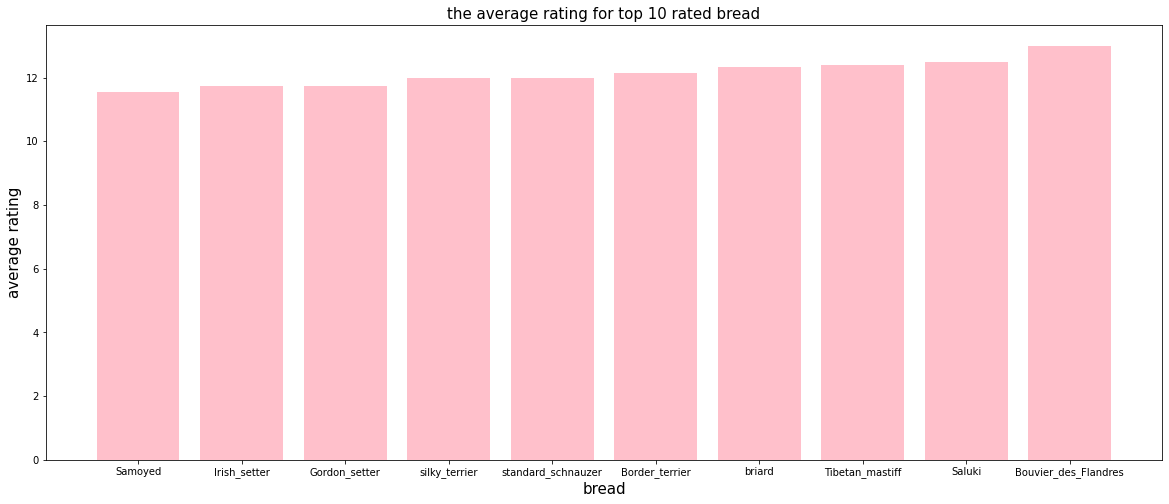

In [376]:
ticks = np.arange(df_bread.shape[0])
label = df_bread.index
fig, ax = plt.subplots(figsize=(20,8))
p = plt.bar(ticks,(df_bread['rating_numerator'] ), tick_label = label, color='pink')
plt.xlabel('bread', fontsize=15)
plt.title('the average rating for top 10 rated bread', fontsize=15)
plt.ylabel('average rating', fontsize=15);

The dog breads have the highest ratings in tweets on average. 

On average, the bread with the highest ratings is Bouvier des Flandres.

it is important to remeber that tweets might have higher ratings but without a bread value (NaN). these are not considered in this analysis.

In [204]:
# the nummber dogs in any age stage for each bread. without NaN values.

df_bread = tweets.groupby('bread').stage.value_counts().to_frame()
df_bread

stage
bread                          stage         
Airedale                       puppo        1
American_Staffordshire_terrier pupper       2
                               puppo        1
Bedlington_terrier             doggo        2
Bernese_mountain_dog           pupper       2
...                                       ...
toy_poodle                     pupper       7
vizsla                         pupper       2
whippet                        doggo        1
                               pupper       1
wire-haired_fox_terrier        floofer      1

[122 rows x 1 columns]

In [205]:
# list of tupples of (bread, stage) available in our dataset. without NaNs. the dog breads we are interested in don't
# appear in the list

df_bread.index.tolist()

[('Airedale', 'puppo'),
 ('American_Staffordshire_terrier', 'pupper'),
 ('American_Staffordshire_terrier', 'puppo'),
 ('Bedlington_terrier', 'doggo'),
 ('Bernese_mountain_dog', 'pupper'),
 ('Blenheim_spaniel', 'doggo'),
 ('Blenheim_spaniel', 'pupper'),
 ('Border_collie', 'pupper'),
 ('Border_collie', 'doggo'),
 ('Boston_bull', 'doggo'),
 ('Brabancon_griffon', 'pupper'),
 ('Brittany_spaniel', 'pupper'),
 ('Cardigan', 'pupper'),
 ('Cardigan', 'puppo'),
 ('Chesapeake_Bay_retriever', 'doggo'),
 ('Chesapeake_Bay_retriever', 'pupper'),
 ('Chihuahua', 'pupper'),
 ('Chihuahua', 'doggo'),
 ('Dandie_Dinmont', 'doggo'),
 ('English_springer', 'doggo'),
 ('English_springer', 'pupper'),
 ('Eskimo_dog', 'puppo'),
 ('Eskimo_dog', 'pupper'),
 ('Eskimo_dog', 'doggo'),
 ('French_bulldog', 'pupper'),
 ('German_shepherd', 'doggo'),
 ('German_shepherd', 'pupper'),
 ('German_shepherd', 'puppo'),
 ('German_short-haired_pointer', 'doggo'),
 ('German_short-haired_pointer', 'pupper'),
 ('Great_Dane', 'doggo'),
 

The top rated dog breads don't have any data about age stages therefore it is not possible to find the most frequent stage for our 10 best rated dog bread.

#### 3 - what is the relationship between the rating and retweet count and favorite count ?

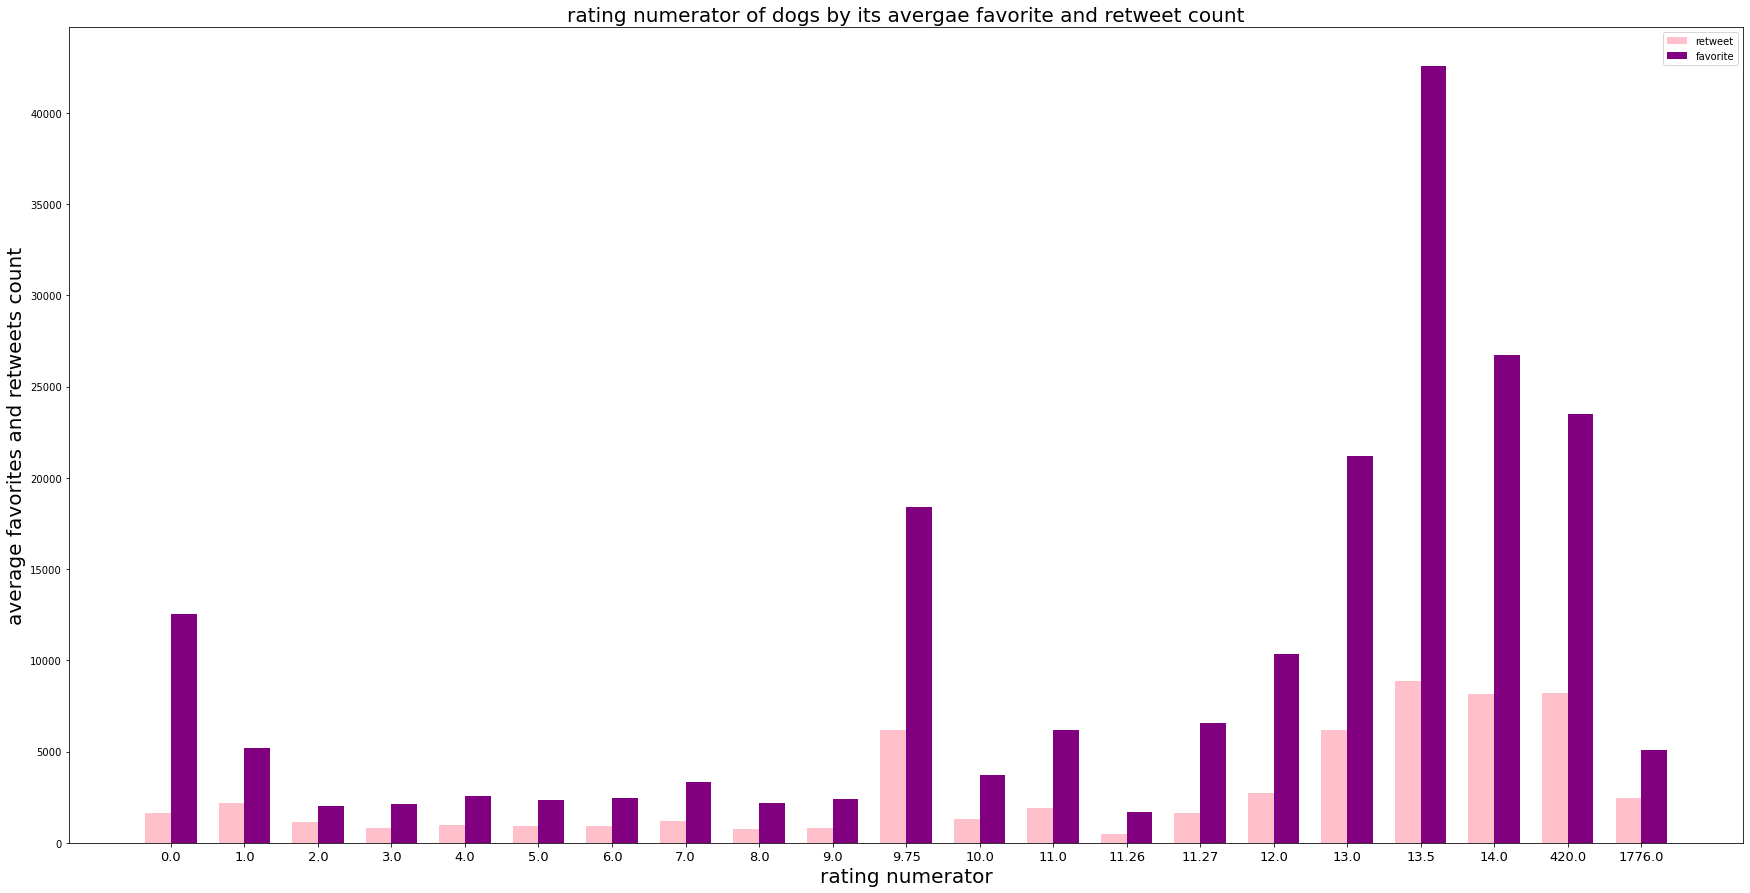

In [423]:
# getting the average favorite and retweet count for each unique value in the rating numerator column

df_count = tweets.groupby('rating_numerator')[['favorite_count', 'retweet_count']].mean()
Grouped_bar(df_count , 'rating numerator', 'by its avergae favorite and retweet count')

In [424]:
df_count

,favorite_count,retweet_count
rating_numerator,,
0.00,12562.000000,1637.000000
1.00,5178.000000,2182.400000
2.00,2012.666667,1155.333333
3.00,2138.421053,819.684211
4.00,2561.437500,986.312500
5.00,2353.843750,905.343750
6.00,2438.062500,899.750000
7.00,3357.519231,1213.653846
8.00,2201.168421,779.052632


Though the favorite count and retweet count seem correlated, their relationship witht the rating variable does not seem very normally distributed and no correlation appears between them.

the most retweeted and favortied tweets are the one rated 13.5/10.

the highest rates of retweet and favorite count appear in tweets with ratings between 12/10 and 14. some outliers need to be taken in consideration, like the ratings: 9.75/10 , 420/10, 1776/10 and 0/10

#### 4 - dog bread and its name, are they related ?

In [329]:
# the most frequent names used
tweets.name.value_counts()

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Tucker      9
           ..
JD          1
Zeus        1
Timmy       1
Jaspers     1
Jerome      1
Name: name, Length: 913, dtype: int64

In [324]:
# Creating a multiIndexed dataset, level one is the name and level two contains the bread. column one has the frequency 
# of how many times the name has been used for each bread

df_bread = tweets.groupby('name').bread.value_counts().to_frame()
df_bread = df_bread.rename(columns={'bread': 'frequency'})

In [330]:
# choosing the 5 most used names I got previously, I can now see for each name what are the breads of dogs and how many
# are named with that name.

idx = pd.IndexSlice
df_bread.loc[idx[['Charlie', 'Oliver', 'Cooper', 'Lucy', 'Tucker'], :], idx['frequency']]

name     bread                         
Charlie  Chihuahua                         2
         Great_Dane                        2
         Labrador_retriever                2
         French_bulldog                    1
         golden_retriever                  1
         kelpie                            1
         toy_poodle                        1
Cooper   Labrador_retriever                2
         Great_Pyrenees                    1
         Norwich_terrier                   1
         Pekinese                          1
         bluetick                          1
         dalmatian                         1
         golden_retriever                  1
         malamute                          1
         whippet                           1
Lucy     golden_retriever                  4
         American_Staffordshire_terrier    1
         Pekinese                          1
         Shih-Tzu                          1
         borzoi                            1
         chow  

The 5 most used names are associated with many dog breads.

But some dog breads are more likely to be named in some name, for example: 4 golden_retriever out of 10 were named Lucy

#### 5 - are the most used dog names and retweet and favorite count related ?

In [334]:
tweets.retweet_count.head()

0    7593.0
1    5627.0
2    3720.0
3    7762.0
4    8365.0
Name: retweet_count, dtype: float64

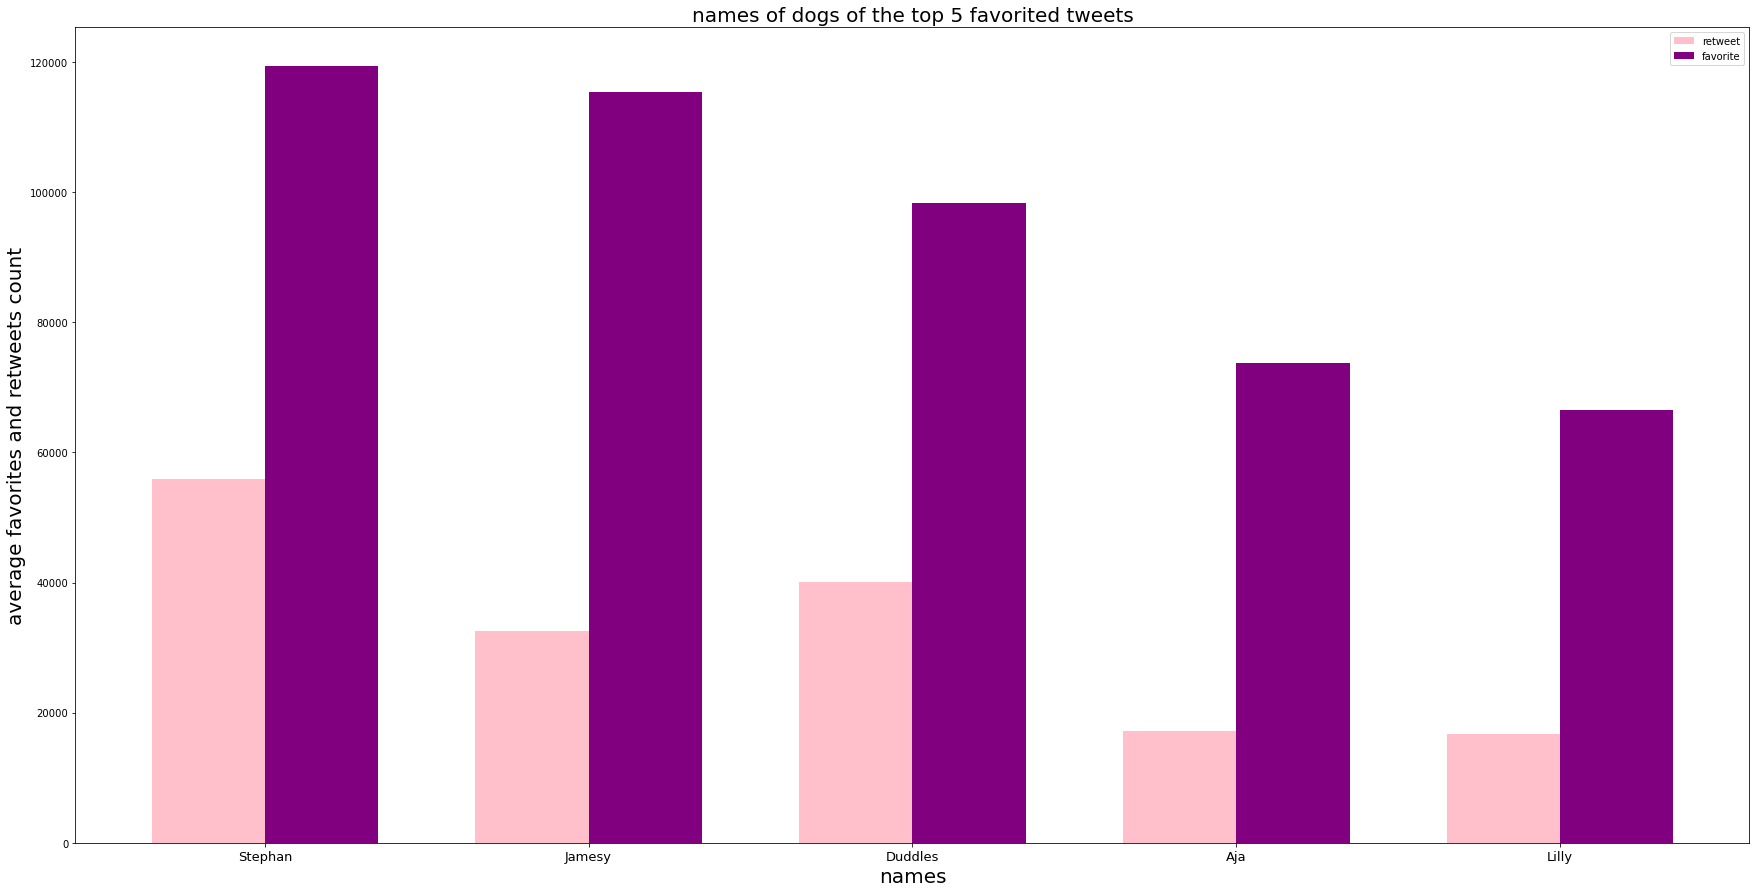

In [426]:
df_name = tweets.groupby('name')[['retweet_count', 'favorite_count']].mean().sort_values(by='favorite_count', axis=0, ascending=False ).head()
Grouped_bar(df_name , 'names', 'of the top 5 favorited tweets')

In [425]:
df_name

,retweet_count,favorite_count
name,,
Stephan,55898.0,119355.0
Duddles,40127.0,98348.0
Jamesy,32541.0,115349.0
Hurley,18346.0,30943.0
Aja,17109.0,73748.0


A simple plot showing the favorite average count and retweet average count of the 5 most favorited tweets and the name of the dogs in those tweets.

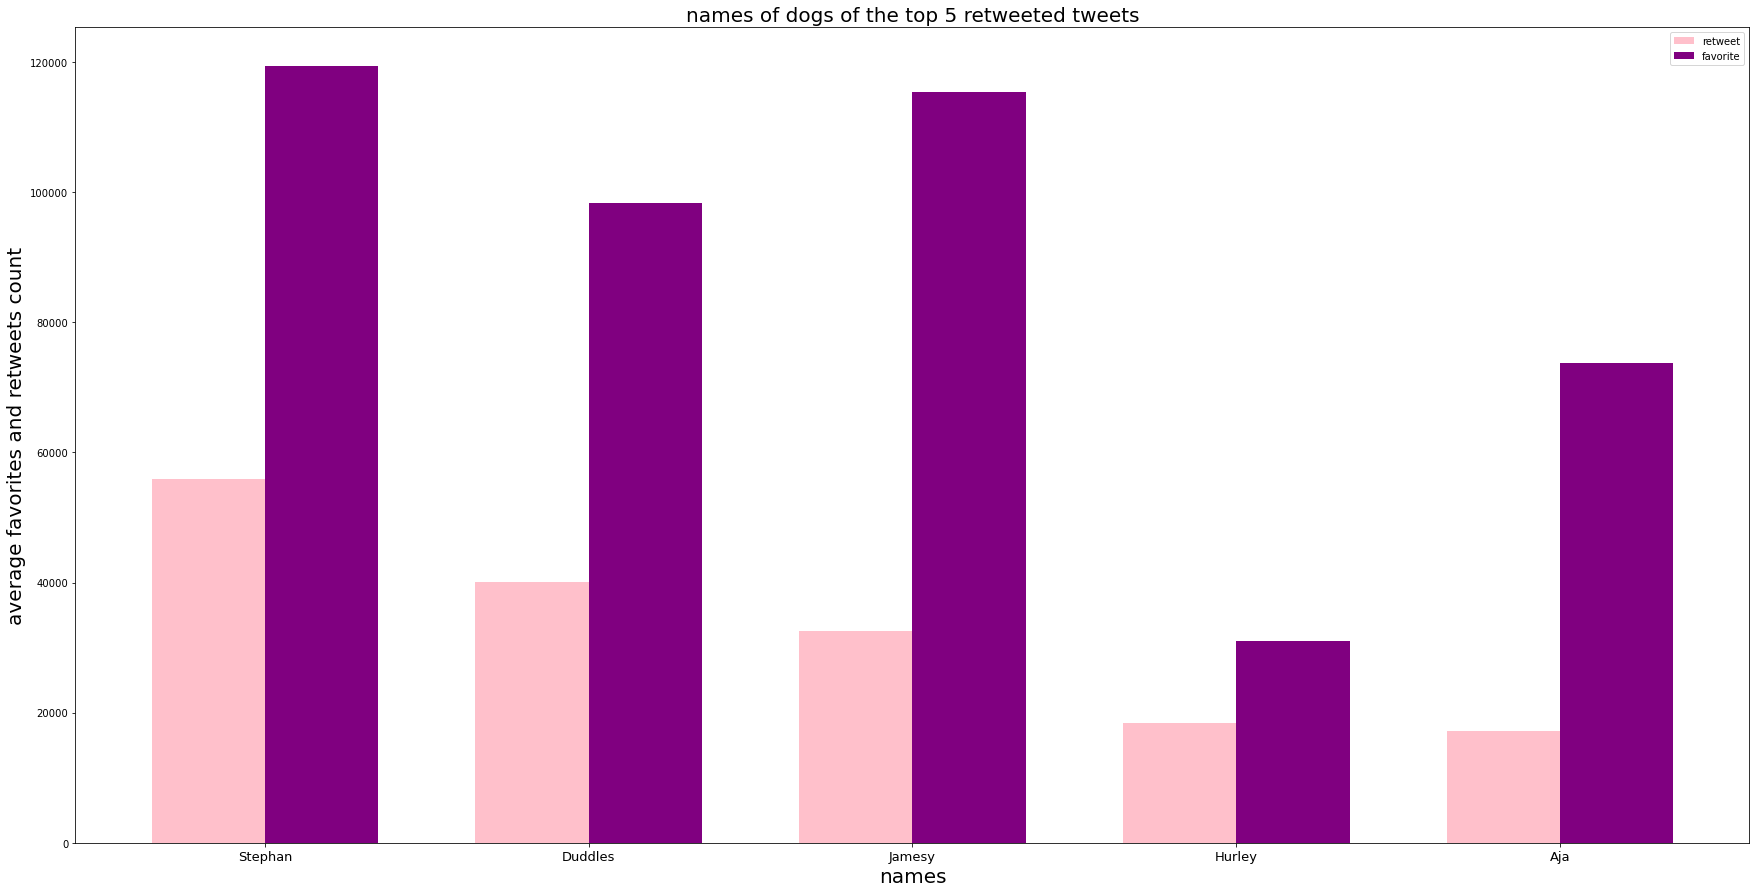

In [427]:
df_name = tweets.groupby('name')[['retweet_count', 'favorite_count']].mean().sort_values(by='retweet_count', axis=0, ascending=False ).head()
Grouped_bar(df_name , 'names', 'of the top 5 retweeted tweets')

In [428]:
df_name

,retweet_count,favorite_count
name,,
Stephan,55898.0,119355.0
Duddles,40127.0,98348.0
Jamesy,32541.0,115349.0
Hurley,18346.0,30943.0
Aja,17109.0,73748.0


Another plot showing the favorite average count and retweet average count of the 5 most retweeted tweets and the name of the dogs in those tweets.

There seem to be no relation between the retweet and favorite count and names because the highest counts of retweets and favorites are not associated with the most used names.